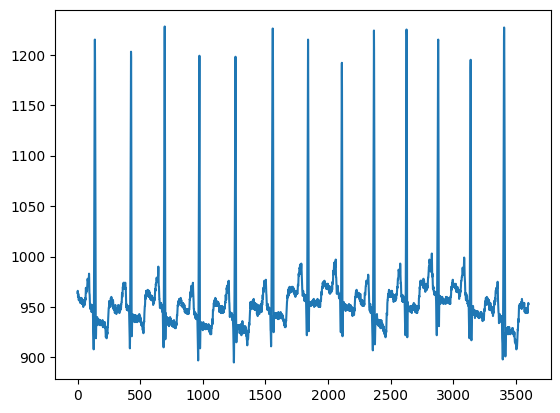

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz, lfilter
from scipy.io import loadmat

# Load ECG data from MAT file
data = loadmat("100m(6).mat")
signal = data['val'].flatten()
plt.plot(signal)
plt.show()

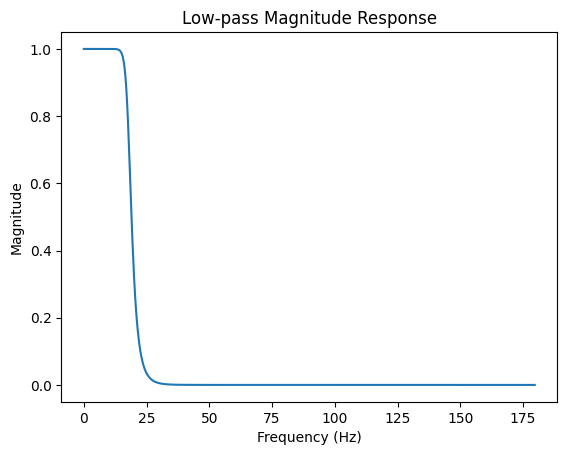

In [59]:
fs = 360
filterorder = 10
cutofflow = 18 / (fs / 2)
cutoffhigh = 4 / (fs / 2)

# Design Low-pass Butterworth filter
b, a = butter(filterorder, cutofflow, btype='low')
w, h = freqz(b, a)
plt.plot((w / np.pi) * (fs / 2), np.abs(h))
plt.title('Low-pass Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

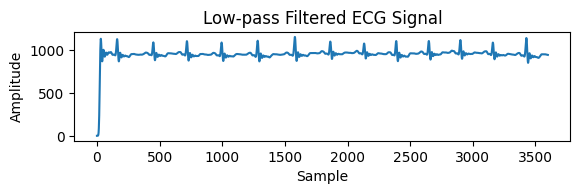

In [60]:
# Apply Low-pass filter
eeglowpass = lfilter(b, a, signal)
plt.subplot(3, 1, 1)
plt.plot(eeglowpass)
plt.title('Low-pass Filtered ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

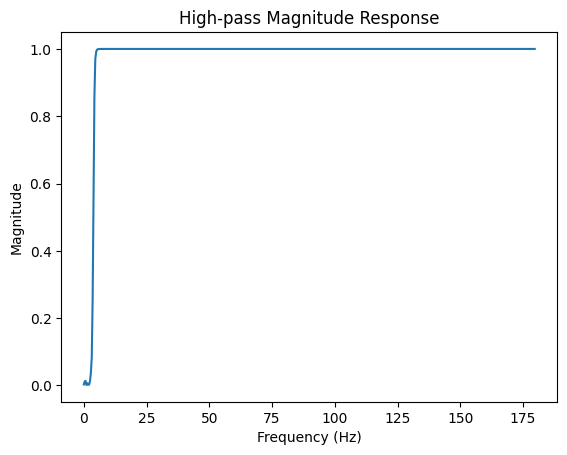

In [61]:
# Design High-pass Butterworth filter
b1, a1 = butter(filterorder, cutoffhigh, btype='high')
w1, h1 = freqz(b1, a1)
plt.plot((w1 / np.pi) * (fs / 2), np.abs(h1))
plt.title('High-pass Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

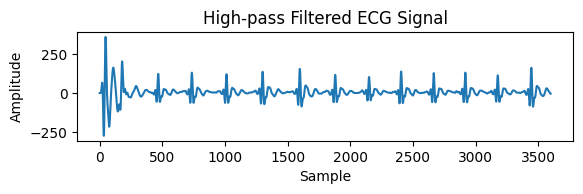

In [62]:
# Apply High-pass filter
eeghighpass = lfilter(b1, a1, eeglowpass)
plt.subplot(3, 1, 2)
plt.plot(eeghighpass)
plt.title('High-pass Filtered ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


In [63]:
pks, locs = find_peaks(eeghighpass[1800:], height=0)
threshold = 2 * (np.std(eeghighpass[1800:]))
rwave = pks > threshold

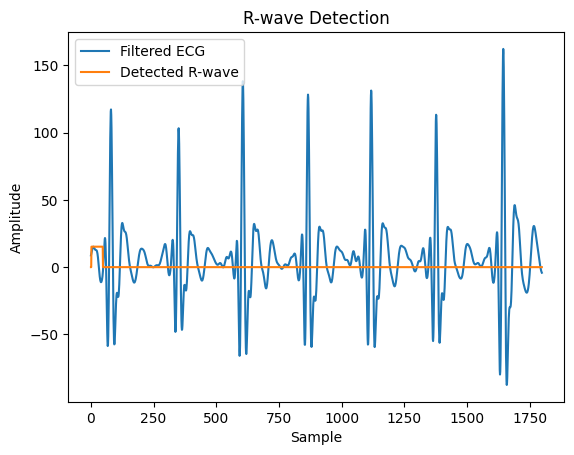

In [65]:
# Get the peak indices from the 'peak_heights' array
peak_indices = np.arange(1800, 1800 + len(locs['peak_heights']))

# Filter the peak indices based on the rwave mask
rwave_indices = peak_indices[rwave]

rwaveform = np.zeros_like(eeghighpass[1800:])
rwaveform[rwave_indices - 1800] = np.max(eeghighpass[1800:][rwave_indices - 1800])


plt.plot(eeghighpass[1800:])
plt.plot(rwaveform)
plt.title('R-wave Detection')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend(['Filtered ECG', 'Detected R-wave'])
plt.show()

In [66]:
beat = np.sum(rwave)
hr = (beat / 5) * 60  # Assuming a 5-second window
print(f'Heart Rate: {hr:.2f} bpm')

Heart Rate: 552.00 bpm


In [68]:
# Calculate RR intervals
rr_intervals = np.diff(locs['peak_heights']) / fs

# Calculate SDNN (Standard Deviation of RR intervals)
sdnn = np.std(rr_intervals)

print(f"Heart Rate: {hr:.2f} bpm")
print(f"Heart Rate Variability (SDNN): {sdnn * 1000:.2f} ms")

Heart Rate: 552.00 bpm
Heart Rate Variability (SDNN): 154.98 ms
